# 0.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.express as px
import sweetviz as sv
from matplotlib import pyplot as plt
from IPython.display import HTML

# 0.2 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [18, 8]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:97% !important; }</style>') )
    pd.options.display.max_columns = 30
    pd.options.display.max_rows = 30
    pd.options.display.float_format = lambda x: f'{x:.2f}'
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set_theme(rc={'figure.figsize': (15, 6)})
jupyter_settings()

def tendencia_central(num_attributes):
    # Tendencia central - mean, ]median
    ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
    ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

    # Dispersão - std, min, max, range, knew, kurtosis
    d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
    d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
    d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
    d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
    d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
    d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

    #Concatenar
    m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
    m.columns =['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

    return m

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 0.3 Loading Data

In [3]:
data = pd.read_csv( 'datasets/kc_house_data.csv' )

# 1.1 Description Data

In [4]:
print('Número de Linhas: {}'.format(data.shape[0]))
print('Número de Colunas: {}'.format(data.shape[1]))

Número de Linhas: 21613
Número de Colunas: 21


In [5]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# Check NA
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# 1.2 Descriptive Statistics

In [7]:
# Numeric Attributes
num_attr = data.select_dtypes(include=['int64', 'int32', 'float64'])
num_attr.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


In [8]:
tendencia_central(num_attr)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580301520.86,3904930410.00,2876499023.43,0.24,-1.26
1,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
3,bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
4,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
5,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
6,floors,1.00,3.50,2.50,1.49,1.50,0.54,0.62,-0.48
7,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.39,127.63
8,view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
9,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53


In [9]:
# Categoric Attributes

# Different items by attribute
cat_attr = data.select_dtypes(exclude=['int64', 'int32', 'float64'])
cat_attr.nunique()

date    372
dtype: int64

# 2.0 Feature Engineering

In [10]:
# Date
data['date'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%m-%d' )

# 3.0 Exploration Data Analysis

# 3.1 Hypotheses

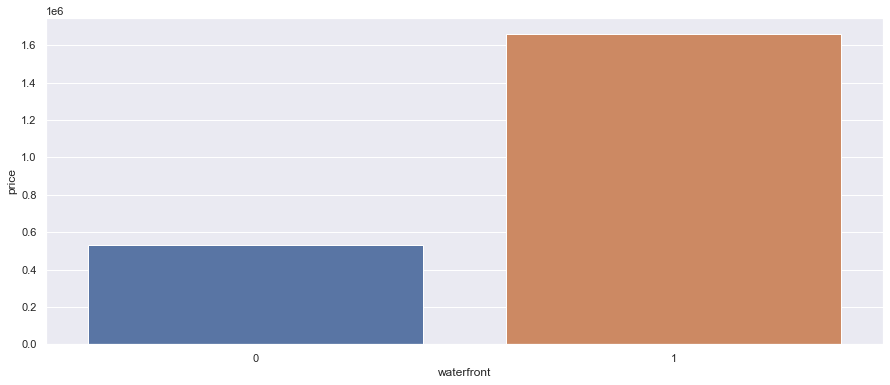

In [10]:
# H1: Os imóveis com vista para água são cerca de 212% mais caros, na média.
dfh1 = data[['waterfront', 'price']].groupby( 'waterfront' ).mean().reset_index()
(dfh1.iloc[1,1] - dfh1.iloc[0,1]) / dfh1.iloc[0,1] * 100

sns.barplot( data=dfh1, x='waterfront', y='price' );

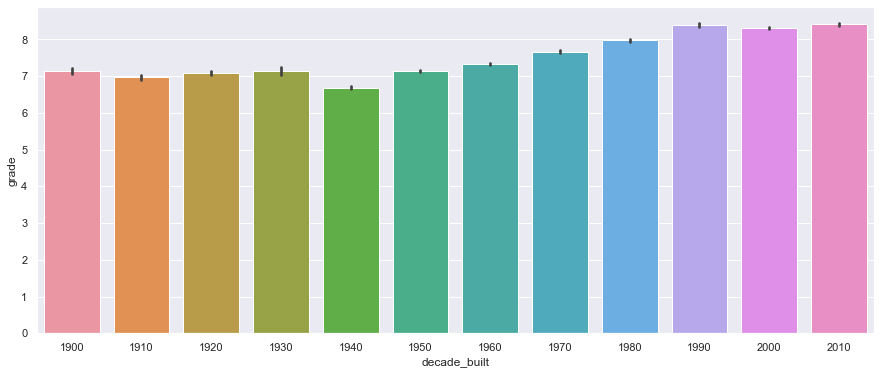

In [11]:
# H2: A avaliação dos imóveis construídos nas últimas três décadas encontra-se em média cerca de 19% acima da avaliação dos imóveis
# construídos entre 1900 e 1959, enquanto que há um crescimento médio de 4,7% por década entre as décadas de 1940 e 1990.
dfh2 = data.copy()
dfh2['decade_built'] = dfh2['yr_built'].apply( lambda x: int((x / 10))  * 10)
dfh2[['decade_built', 'grade']].groupby( 'decade_built' ).mean().reset_index()
sns.barplot( data=dfh2, x='decade_built', y='grade' );

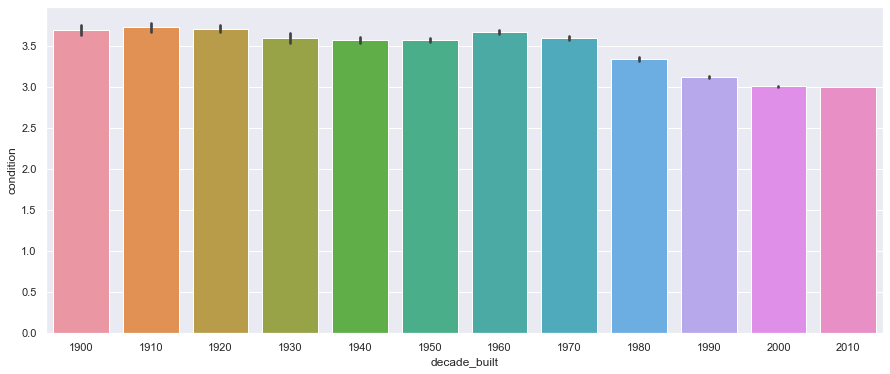

In [12]:
# H3: Para os imóveis construídos após a década de 1960, a condição diminui em média cerca de 4% por década.
dfh3 = data.copy()
dfh3['decade_built'] = dfh3['yr_built'].apply( lambda x: int((x / 10))  * 10)
dfh3[['decade_built', 'condition']].groupby( 'decade_built' ).mean().reset_index()
sns.barplot( data=dfh3, x='decade_built', y='condition' );

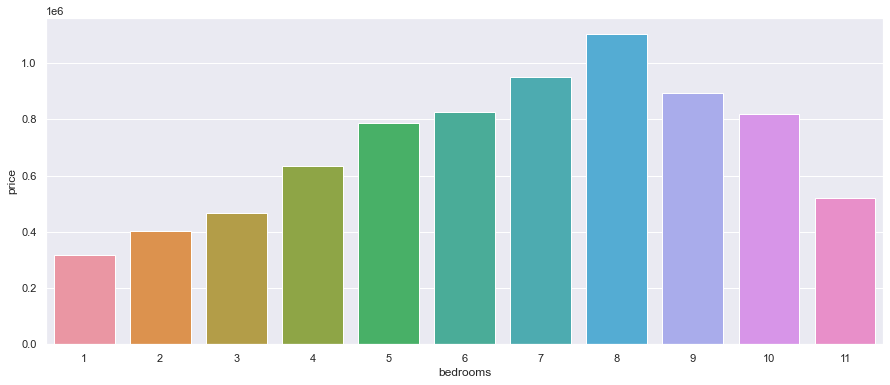

In [13]:
# H4: Para imóveis que possuem entre 1 e 8 quartos, o preço aumenta em média cerca de 20% conforme aumenta-se a quantidade de quartos.
dfh4 = data.loc[( data['bedrooms'] > 0 ) & ( data['bedrooms'] <= 11 ),
                      ['price', 'bedrooms']].groupby( 'bedrooms' ).mean().reset_index()

sns.barplot( x='bedrooms', y='price', data=dfh4 );

# 3.2 Buy Recommendation
    Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

In [14]:
# Median per filters (waterfront, zipcode and grade)
df1 = data[['id', 'date', 'price', 'zipcode', 'grade', 'waterfront', 'condition']]
df2 = df1.copy()
df2['price_median'] = 0.0

for h in df2['waterfront'].unique():
    for i in df2['zipcode'].unique():
        df4 = df2.loc[(df2['waterfront'] == h) & (df2['zipcode'] == i), ['price', 'grade']].groupby( 'grade' ).median().reset_index()
        for j in df4['grade']:
            df2.loc[( df2['waterfront'] == h ) & ( df2['zipcode'] == i ) & ( df2['grade'] == j ), 'price_median'] = float( df4.loc[df4['grade'] == j, 'price'] )

In [15]:
# Classifies the properties
df3 = df2.copy()
df3['status'] = 'NA'

for i in range( len( df3 ) ):
    if ( df3.loc[i, 'condition'] == 5 ) & ( df3.loc[i, 'price'] < df3.loc[i, 'price_median'] ):
        df3.loc[i, 'status'] = '1 compra A'
    elif ( df3.loc[i, 'condition'] == 4 ) & ( df3.loc[i, 'price'] < df3.loc[i, 'price_median'] ):
        df3.loc[i, 'status'] = '2 compra B'
    elif ( df3.loc[i, 'condition'] == 3 ) & ( df3.loc[i, 'price'] < df3.loc[i, 'price_median'] ):
        df3.loc[i, 'status'] = '3 neutro'
    else:
        df3.loc[i, 'status'] = '4 nao compra'

In [16]:
# Upside
df3['upside'] = ( df3['price_median'] - df3['price'] ) / df3['price_median'] * 100

In [17]:
df4 = df3[['id', 'price', 'zipcode', 'grade', 'waterfront', 'condition', 'price_median', 'status', 'upside']]
df4.sort_values( ['status', 'upside'], ascending=[True, False] ).head()

,id,price,zipcode,grade,waterfront,condition,price_median,status,upside
17197,5111400086,110000.00,98038,6,0,5,222000.00,1 compra A,50.45
4134,7129302615,292000.00,98118,8,0,5,579000.00,1 compra A,49.57
2026,5347200160,235000.00,98126,7,0,5,420000.00,1 compra A,44.05
14241,1922059010,140000.00,98030,6,0,5,248000.00,1 compra A,43.55
10969,3271300955,554729.00,98199,9,0,5,960000.00,1 compra A,42.22


In [18]:
df4[['id', 'status']].groupby( 'status' ).count().reset_index()

,status,id
0,1 compra A,468
1,2 compra B,2562
2,3 neutro,7420
3,4 nao compra,11163


# 3.3 Sell Recommendation
    Uma vez comprados os imóveis, qual o melhor momento para vendê-los e por qual preço?

In [19]:
# Median per season
df4 = df3.copy()

df4['month'] = pd.to_datetime( data['date'] ).dt.strftime( '%m' )
df4['month'] = df4['month'].astype('int64')
df4['season'] = df4['month'].apply( lambda x:
                                   'primavera' if ( x >= 3 ) & ( x <= 5 ) else
                                   'verao' if ( x >= 6 ) & ( x <= 8 ) else
                                   'outono' if ( x >= 9 ) & ( x <= 11 ) else 'inverno')
df4['season_variation'] = df4['season'].apply( lambda x: 6.429 if x == 'inverno' else 4.098 if x == 'outono' else
                                                          0.000 if x == 'primavera' else 1.065 )

In [20]:
# New upside and profit
df5 = df4.loc[( df4['status'] != '3 neutro' ) & ( df4['status'] != '4 nao compra' ),
          ['id', 'season', 'status', 'price', 'price_median', 'upside', 'season_variation']]

df5['price_median'] = df5['price_median'] * ( 1 + ( df5['season_variation'] / 100 ) )
df5['upside'] = ( df5['price_median'] - df5['price'] ) / df5['price_median'] * 100
df5['profit'] = df5['price_median'] * df5['upside'] / 100
df6 = df5[['id', 'season', 'status', 'price', 'price_median', 'upside', 'profit']]
df6 = df6.rename(columns={"price": "price_buy", "price_median":"price_sell"})

In [21]:
df6.sort_values( ['status', 'upside'], ascending=[True, False] ).head()

,id,season,status,price_buy,price_sell,upside,profit
17197,5111400086,primavera,1 compra A,110000.00,222000.00,50.45,112000.00
4134,7129302615,primavera,1 compra A,292000.00,579000.00,49.57,287000.00
14241,1922059010,inverno,1 compra A,140000.00,263943.92,46.96,123943.92
2026,5347200160,primavera,1 compra A,235000.00,420000.00,44.05,185000.00
17128,4337600005,inverno,1 compra A,153000.00,271393.95,43.62,118393.95


In [22]:
# 01 Geral
df_group1 = df6[['upside', 'status']].groupby( 'status' ).mean().reset_index()
df_group2 = df6[['profit', 'status']].groupby( 'status' ).mean().reset_index()
df_group3 = df6[['id', 'status']].groupby( 'status' ).count().reset_index()
df7 = pd.merge( df_group1, df_group2, on='status', how='inner' )
df7 = pd.merge( df7, df_group3, on='status', how='inner' )
df7

,status,upside,profit,id
0,1 compra A,14.16,72943.52,468
1,2 compra B,15.58,77234.78,2562


In [23]:
# 02 Primeira situação
df8 = df6.loc[df6['status'] == '1 compra A', ['price_buy', 'price_sell', 'profit', 'upside']].sort_values( 'upside', ascending=False ).head(100).reset_index()
df8['price_buy'].sum()
df8['price_sell'].sum()
df8['profit'].sum()
df8['profit'].mean()
df8['upside'].mean()

29.26424223456809

In [24]:
# 03 Segunda situação
df8 = df6.loc[df6['status'] == '2 compra B', ['price_buy', 'price_sell', 'profit', 'upside']].sort_values( 'upside', ascending=False ).head(100).reset_index()
df8['price_buy'].sum()
df8['price_sell'].sum()
df8['profit'].sum()
df8['profit'].mean()
df8['upside'].mean()

43.19133829191259

In [25]:
# 04 Terceira situação
df8 = df6[['price_buy', 'price_sell', 'profit', 'upside']].sort_values( 'upside', ascending=False ).head(100).reset_index()
df8['price_buy'].sum()
df8['price_sell'].sum()
df8['profit'].sum()
df8['profit'].mean()
df8['upside'].mean()

43.899681853155755

In [26]:
# 05 Quarta situação
df8 = df6.loc[df6['status'] == '1 compra A', ['price_buy', 'price_sell', 'profit', 'upside']].sort_values( 'upside', ascending=False ).head(50).reset_index()
df9 = df6.loc[df6['status'] == '2 compra B', ['price_buy', 'price_sell', 'profit', 'upside']].sort_values( 'upside', ascending=False ).head(50).reset_index()
df10 = pd.concat([df8, df9], axis=0)
df10['price_buy'].sum()
df10['price_sell'].sum()
df10['profit'].sum()
df10['profit'].mean()
df10['upside'].mean()

41.028100604016366